In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

imp_fert=pd.read_csv('~/git/BD/temp/imp_fert_ncm_quanti.csv')

up_est_o=imp_fert[(imp_fert.km==imp_fert.km.min())&(imp_fert.nick=='NP')]


up_est_o.head(1)

,CO_ANO,CO_MES,CO_NCM,nick,SG_UF_NCM,CO_PAIS,CO_URF,KG_LIQUIDO,VL_FOB,VL_FRETE,...,log_frete_s,log_cif_s,log_preço_fob_s,log_preço_frete_s,log_preço_cif_s,km,erro_s_kg,erro_s_fob,erro_i_kg,erro_i_fob
57598,1999,12,31055900,NP,RS,383,1015400,1228549.0,209193.0,18960,...,0.607521,0.54385,0.136422,0.402069,0.094348,1,0.0,0.0,0.0,0.0


In [2]:
up_est_o['UF']=up_est_o.SG_UF_NCM

In [3]:
mn_poly=pd.read_csv('~/git/BD/temp/mn_poly.csv')
mn_poly.head(1)

,CO_ANO,CO_MES,CO_SH4,CO_PAIS,UF,CO_MUN,KG_LIQUIDO,VL_FOB,CO_NCM,VL_FRETE,VL_SEGURO,kg_orig,fob_orig
0,1997,1,3102,23,GO,5301108.0,1900000,184300,31022100.0,19000.0,0.0,1900000,184300


In [4]:
up_est_o=up_est_o.merge(mn_poly,on=['CO_ANO','CO_MES','CO_NCM','CO_PAIS','UF'],how='left')
up_est_o.head(1)

,CO_ANO,CO_MES,CO_NCM,nick,SG_UF_NCM,CO_PAIS,CO_URF,KG_LIQUIDO_x,VL_FOB_x,VL_FRETE_x,...,erro_i_fob,UF,CO_SH4,CO_MUN,KG_LIQUIDO_y,VL_FOB_y,VL_FRETE_y,VL_SEGURO,kg_orig,fob_orig
0,1999,12,31055900,NP,RS,383,1015400,1228549.0,209193.0,18960,...,0.0,RS,3105.0,4304606.0,1228549.0,108432.0,9828.0,360.0,1228549.0,108432.0


In [5]:
mun=pd.read_csv('~/git/BD/Comexstat/tab_complementares/UF_MUN.csv',encoding='Latin-1',sep=';')

In [6]:
mun=mun.rename(columns={'CO_MUN_GEO':'CO_MUN'})

In [7]:
up_est_o=up_est_o.merge(mun[['CO_MUN','NO_MUN']]).rename(columns={'KG_LIQUIDO_x':'KG_LIQUIDO','VL_FOB_x':'VL_FOB'})

In [41]:
up_est_o[[
    'CO_ANO', 'CO_MES', 'nick','CO_NCM','CO_SH4', 'CO_PAIS_ISOA3','NO_MUN','UF', 'KG_LIQUIDO', 'kg_orig', 'VL_FOB', 'fob_orig',\
    'VL_FRETE_x',   'preço_fob', 'preço_frete', 'preço_cif', 'SG_UF_NCM', 'CO_PAIS', 'CO_URF'
]][(up_est_o.CO_ANO.isin([2021,2024]))&(up_est_o.preço_cif>.7)].sort_values(by=['CO_ANO','CO_MES'])

,CO_ANO,CO_MES,nick,CO_NCM,CO_SH4,CO_PAIS_ISOA3,NO_MUN,UF,KG_LIQUIDO,kg_orig,VL_FOB,fob_orig,VL_FRETE_x,preço_fob,preço_frete,preço_cif,SG_UF_NCM,CO_PAIS,CO_URF
463,2021,1,NP,31055900,3105.0,CHN,MOSSORO,RN,403200.0,1133200.0,302720.0,660926.0,26718,0.750794,0.066265,0.817059,RN,160,317900
464,2021,2,NP,31055900,3105.0,RUS,RIBEIRAO PRETO,SP,120000.0,120000.0,92194.0,76829.0,5490,0.768283,0.045750,0.814033,SP,676,817800
465,2021,3,NP,31055900,3105.0,LTU,CANDEIAS,BA,144000.0,144000.0,121173.0,101382.0,5787,0.841479,0.040188,0.881667,BA,442,517800
466,2021,4,NP,31055900,3105.0,LTU,CANDEIAS,BA,72000.0,72000.0,59735.0,50178.0,3716,0.829653,0.051611,0.881264,BA,442,517800
472,2021,7,NP,31055900,3105.0,LTU,CANDEIAS,BA,72000.0,72000.0,69055.0,58697.0,5697,0.959097,0.079125,1.038222,BA,442,517800
473,2021,7,NP,31055900,3105.0,CHN,MOSSORO,RN,800000.0,800000.0,636804.0,541284.0,75595,0.796005,0.094494,0.890499,RN,160,317900
475,2021,8,NP,31055900,3105.0,LTU,CANDEIAS,BA,72000.0,72000.0,68606.0,58716.0,5605,0.952861,0.077847,1.030708,BA,442,817800
478,2021,8,NP,31055900,3105.0,LTU,PORTO NACIONAL,TO,1000000.0,1000000.0,815464.0,697902.0,44810,0.815464,0.044810,0.860274,TO,442,317903
483,2021,9,NP,31055900,3105.0,LTU,QUERENCIA,MT,1000000.0,1000000.0,809928.0,697888.0,44506,0.809928,0.044506,0.854434,MT,442,217800
485,2021,9,NP,31055900,3105.0,JOR,PARANAGUA,PR,312000.0,312000.0,238663.0,205648.0,36208,0.764946,0.116051,0.880997,PR,403,917800


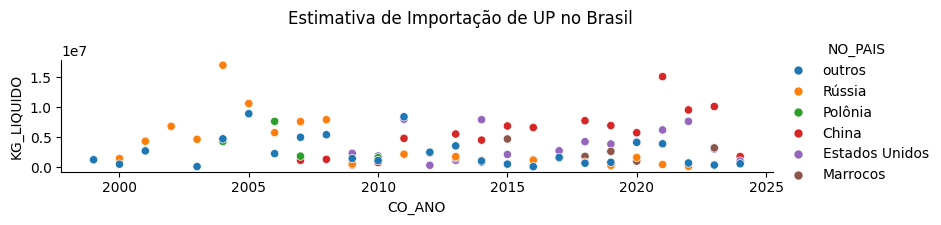

In [9]:
up_est_o_ano_pais=up_est_o.groupby(by=['CO_ANO','NO_PAIS']).KG_LIQUIDO.sum().reset_index().sort_values('KG_LIQUIDO')

l=up_est_o_ano_pais.groupby('NO_PAIS').KG_LIQUIDO.sum().reset_index().sort_values('KG_LIQUIDO').tail(5).NO_PAIS.values

up_est_o_ano_pais.loc[~up_est_o_ano_pais.NO_PAIS.isin(l),'NO_PAIS']='outros'

title='Estimativa de Importação de UP no Brasil'

up_est_o_ano_pais_ano_pais_kg=up_est_o_ano_pais.groupby(by=['CO_ANO','NO_PAIS']).KG_LIQUIDO.sum().reset_index()

sns.relplot(data=up_est_o_ano_pais_ano_pais_kg,x='CO_ANO',y='KG_LIQUIDO',hue='NO_PAIS',height=2,aspect=4).fig.suptitle(title,y=1.1)
plt.show()

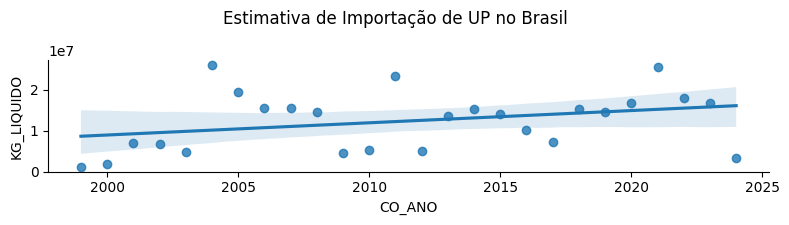

In [10]:
up_est_o_ano_pais_ano=up_est_o_ano_pais.groupby(by=['CO_ANO']).KG_LIQUIDO.sum().reset_index()

sns.lmplot(data=up_est_o_ano_pais_ano,x='CO_ANO',y='KG_LIQUIDO',height=2,aspect=4).fig.suptitle(title,y=1.1)
plt.show()

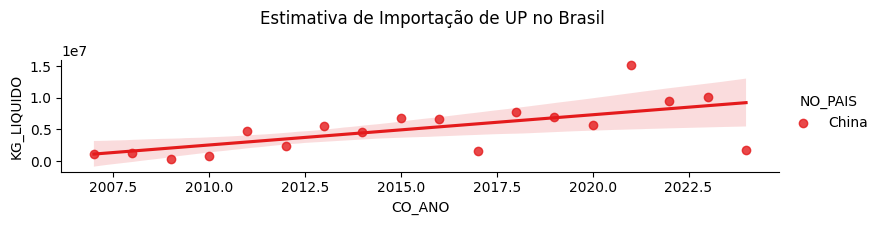

In [11]:
up_est_o_ano_pais_ano_china=up_est_o_ano_pais[(up_est_o_ano_pais.NO_PAIS=='China')].groupby(by=['CO_ANO','NO_PAIS']).KG_LIQUIDO.sum().reset_index()

sns.lmplot(data=up_est_o_ano_pais_ano_china,x='CO_ANO',y='KG_LIQUIDO',hue='NO_PAIS',height=2,aspect=4,palette='Set1').fig.suptitle(title,y=1.1)
plt.show()

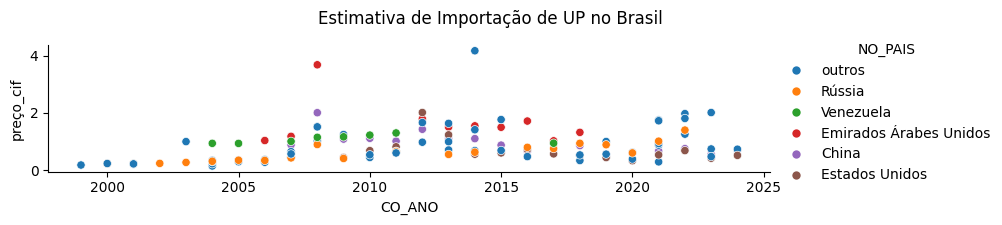

In [12]:
up_est_o_ano_pais_preço_cif=up_est_o.groupby(by=['CO_ANO','NO_PAIS']).preço_cif.mean().reset_index()



l=up_est_o_ano_pais_preço_cif.groupby('NO_PAIS').preço_cif.sum().reset_index().sort_values('preço_cif').tail(5).NO_PAIS.values

up_est_o_ano_pais_preço_cif.loc[~up_est_o_ano_pais_preço_cif.NO_PAIS.isin(l),'NO_PAIS']='outros'

sns.relplot(data=up_est_o_ano_pais_preço_cif,x='CO_ANO',y='preço_cif',hue='NO_PAIS',height=2,aspect=4).fig.suptitle(title,y=1.1)
plt.show()

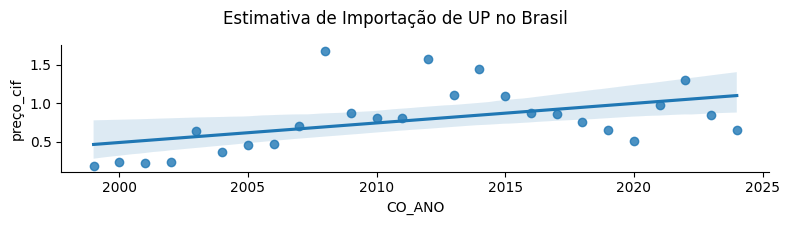

In [13]:
up_est_o_ano_preço_cif=up_est_o_ano_pais_preço_cif.groupby(by=['CO_ANO']).preço_cif.mean().reset_index()

sns.lmplot(data=up_est_o_ano_preço_cif,x='CO_ANO',y='preço_cif',height=2,aspect=4).fig.suptitle(title,y=1.1)
plt.show()

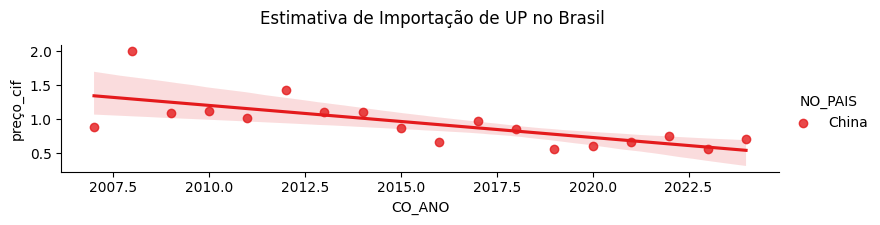

In [14]:
up_est_o_ano_preço_cif_china=up_est_o_ano_pais_preço_cif[(up_est_o_ano_pais_preço_cif.NO_PAIS=='China')].groupby(by=['CO_ANO','NO_PAIS']).preço_cif.mean().reset_index()

sns.lmplot(data=up_est_o_ano_preço_cif_china,x='CO_ANO',y='preço_cif',hue='NO_PAIS',height=2,aspect=4,palette='Set1').fig.suptitle(title,y=1.1)
plt.show()

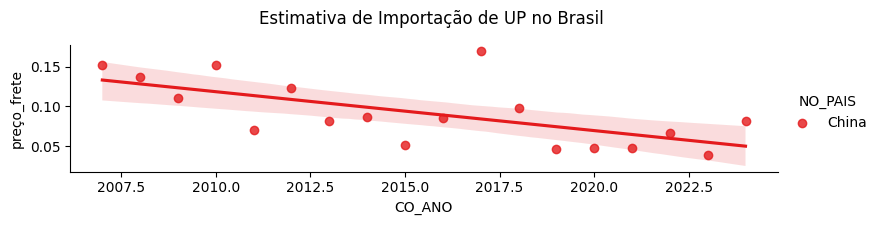

In [15]:
up_est_o_china_preço_frete=up_est_o[up_est_o.NO_PAIS=='China'].groupby(by=['CO_ANO','NO_PAIS']).preço_frete.mean().reset_index()

sns.lmplot(data=up_est_o_china_preço_frete,x='CO_ANO',y='preço_frete',height=2,aspect=4,hue='NO_PAIS',palette='Set1').fig.suptitle(title,y=1.1)
plt.show()

In [16]:
up_est_o_mes=up_est_o.groupby(by=['CO_MES']).KG_LIQUIDO.count().reset_index().rename(columns={'KG_LIQUIDO':'#desembarques'})

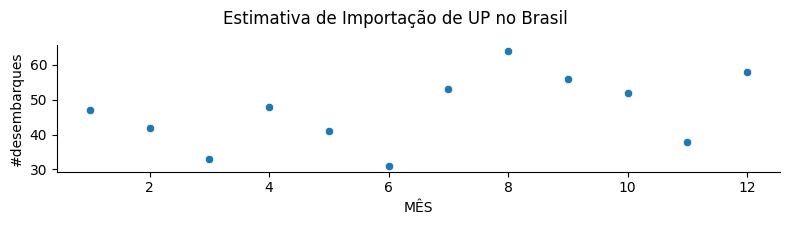

In [17]:
sns.relplot(data=up_est_o_mes.rename(columns={'CO_MES':'MÊS'}),x='MÊS',y='#desembarques',height=2,aspect=4).fig.suptitle(title,y=1.1)
plt.show()

# BAHIA

In [18]:
up_est_o_ba=up_est_o[up_est_o.SG_UF_NCM=='BA'].groupby(by=['CO_ANO','SG_UF_NCM','NO_PAIS']).KG_LIQUIDO.sum().reset_index()

In [19]:
l=up_est_o_ba.groupby('NO_PAIS').KG_LIQUIDO.sum().reset_index().sort_values('KG_LIQUIDO').tail(5).NO_PAIS.values

up_est_o_ba.loc[~up_est_o_ba.NO_PAIS.isin(l),'NO_PAIS']='outros'

In [20]:
title='Estimativa de Importação de UP na Bahia'

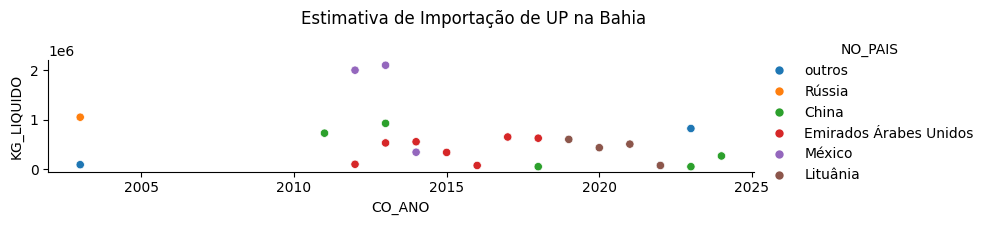

In [21]:
sns.relplot(data=up_est_o_ba,x='CO_ANO',y='KG_LIQUIDO',height=2,aspect=4, hue='NO_PAIS').fig.suptitle(title,y=1.1)
plt.show()

In [22]:
up_est_o

,CO_ANO,CO_MES,CO_NCM,nick,SG_UF_NCM,CO_PAIS,CO_URF,KG_LIQUIDO,VL_FOB,VL_FRETE_x,...,UF,CO_SH4,CO_MUN,KG_LIQUIDO_y,VL_FOB_y,VL_FRETE_y,VL_SEGURO,kg_orig,fob_orig,NO_MUN
0,1999,12,31055900,NP,RS,383,1015400,1228549.0,209193.0,18960,...,RS,3105.0,4304606.0,1228549.0,108432.0,9828.0,360.0,1228549.0,108432.0,CANOAS
1,2000,9,31055900,NP,PR,676,917600,475000.0,102421.0,9588,...,PR,3105.0,4103701.0,475000.0,54625.0,5114.0,0.0,475000.0,54625.0,CAMBE
2,2000,9,31055900,NP,SC,845,927601,485370.0,106477.0,9101,...,SC,3105.0,4218806.0,485370.0,56788.0,4854.0,0.0,485370.0,56788.0,TURVO
3,2000,10,31055900,NP,AM,676,917600,950000.0,205566.0,17757,...,AM,3105.0,1302603.0,950000.0,109978.0,9500.0,0.0,3959586.0,563827.0,MANAUS
4,2001,3,31055900,NP,SC,845,917600,1000580.0,207515.0,18415,...,SC,3105.0,4218806.0,1125580.0,127875.0,10631.0,0.0,1125580.0,127875.0,TURVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,2024,4,31055900,NP,PR,245,917800,300000.0,196969.0,4342,...,PR,3105.0,4106902.0,300000.0,195000.0,4299.0,0.0,300000.0,195000.0,CURITIBA
559,2024,4,31055900,NP,TO,249,317903,1001780.0,484484.0,38454,...,TO,3105.0,1716109.0,1001780.0,479640.0,38070.0,419.0,1001780.0,479640.0,PARAISO DO TOCANTINS
560,2024,6,31055900,NP,GO,160,917800,500132.0,225702.0,9080,...,GO,3105.0,5301405.0,500132.0,224950.0,9050.0,0.0,500132.0,224950.0,APARECIDA DE GOIANIA
561,2024,7,31055900,NP,MS,160,917800,1000000.0,444000.0,16000,...,MS,3105.0,5201102.0,1000000.0,444000.0,16000.0,0.0,1000000.0,444000.0,AQUIDAUANA
